# Basic Libraries

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\isido\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [3]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier

# Expectation Value/Running Functions
from Result_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, evaluator

# Noise Model

In [4]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [5]:
 noise_model = generateNoiseModel(machine, coherent = True, incoherent = False, readout= False)

# Variational Form
For Hydrogen

In [6]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [7]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    noisy = evaluator(circuits, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator)
    ideal = evaluator(circuits, samples, None, Hamiltonian, Hamiltonian_weights, simulator)
    return noisy, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(d, u)
        p2 = random.uniform(d, u)
        p3 = random.uniform(d, u)


        noisy, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy])
        diff.append(noisy-ideal)
        
    return energies, diff
energies, diff = main()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

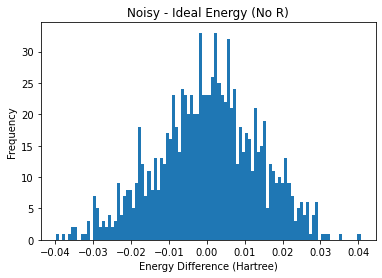

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff, bins=100, color = "tab:blue")
plt.title("Noisy - Ideal Energy (No R)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.show()
a.savefig('NoR.png', dpi = 1000)

In [9]:
energies

[[[0.533906415983564, 1.8371601059099678, 1.1708632675861708],
  -0.5519120183407937,
  -0.5362655339657938],
 [[2.677119325990338, 1.450231581499068, 1.753239648537697],
  -0.39904629568454375,
  -0.39718692068454375],
 [[2.3343394284300185, -1.3725463802367515, 0.04920144825191697],
  -0.11721231130954383,
  -0.13812490896579382],
 [[0.18783382225861045, -3.041875637553534, -3.0966017631488842],
  -1.1419012761532936,
  -1.1152848210751687],
 [[1.90463987254053, 1.9970225234111796, 2.7994048618042013],
  0.13210897775295632,
  0.11544491525295632],
 [[-1.6796378763503406, 1.309804483235637, 1.8505057094035378],
  -1.0702457585751683,
  -1.0348094792782936],
 [[-1.781331766687649, 2.729110700389281, 2.206826624723842],
  -0.20391421560641879,
  -0.2097345281064188],
 [[2.119202775716209, 0.7782156922608725, -0.3479552370769139],
  -0.11271499685641881,
  -0.11121402029391882],
 [[1.7755052073437492, 1.608311504785802, 1.3158822833269062],
  -0.9891197820126685,
  -0.9643722234189185],

In [10]:
diff

[0.015646484374999936,
 0.0018593749999999964,
 -0.02091259765624999,
 0.026616455078124934,
 -0.016664062500000007,
 0.03543627929687476,
 -0.005820312500000008,
 0.0015009765624999921,
 0.024747558593749996,
 -0.001948974609374994,
 -0.012856445312499992,
 -0.004257812499999958,
 0.0064316406250000124,
 0.014895507812500042,
 -0.011689453124999999,
 0.020995117187500023,
 -0.030008789062500013,
 0.028902832031250103,
 -0.0063969726562499996,
 0.015315917968750037,
 0.0039047851562499236,
 0.01398046874999992,
 0.0016875000000000084,
 -0.0009108886718749432,
 -0.010512207031249998,
 -0.008477783203124978,
 0.015111816406249812,
 -0.007659667968750006,
 -0.009303466796875007,
 0.0010144042968749933,
 0.005622558593749993,
 0.014168701171874964,
 0.00276367187500004,
 -0.0005908203125000178,
 0.013482421875000039,
 -0.010097167968749987,
 -0.016982421874999987,
 0.01678613281250002,
 0.019574218749999983,
 -0.017554443359375005,
 -0.015789306640625028,
 0.00705786132812497,
 0.007056396

# Without Readout